## Модуляция

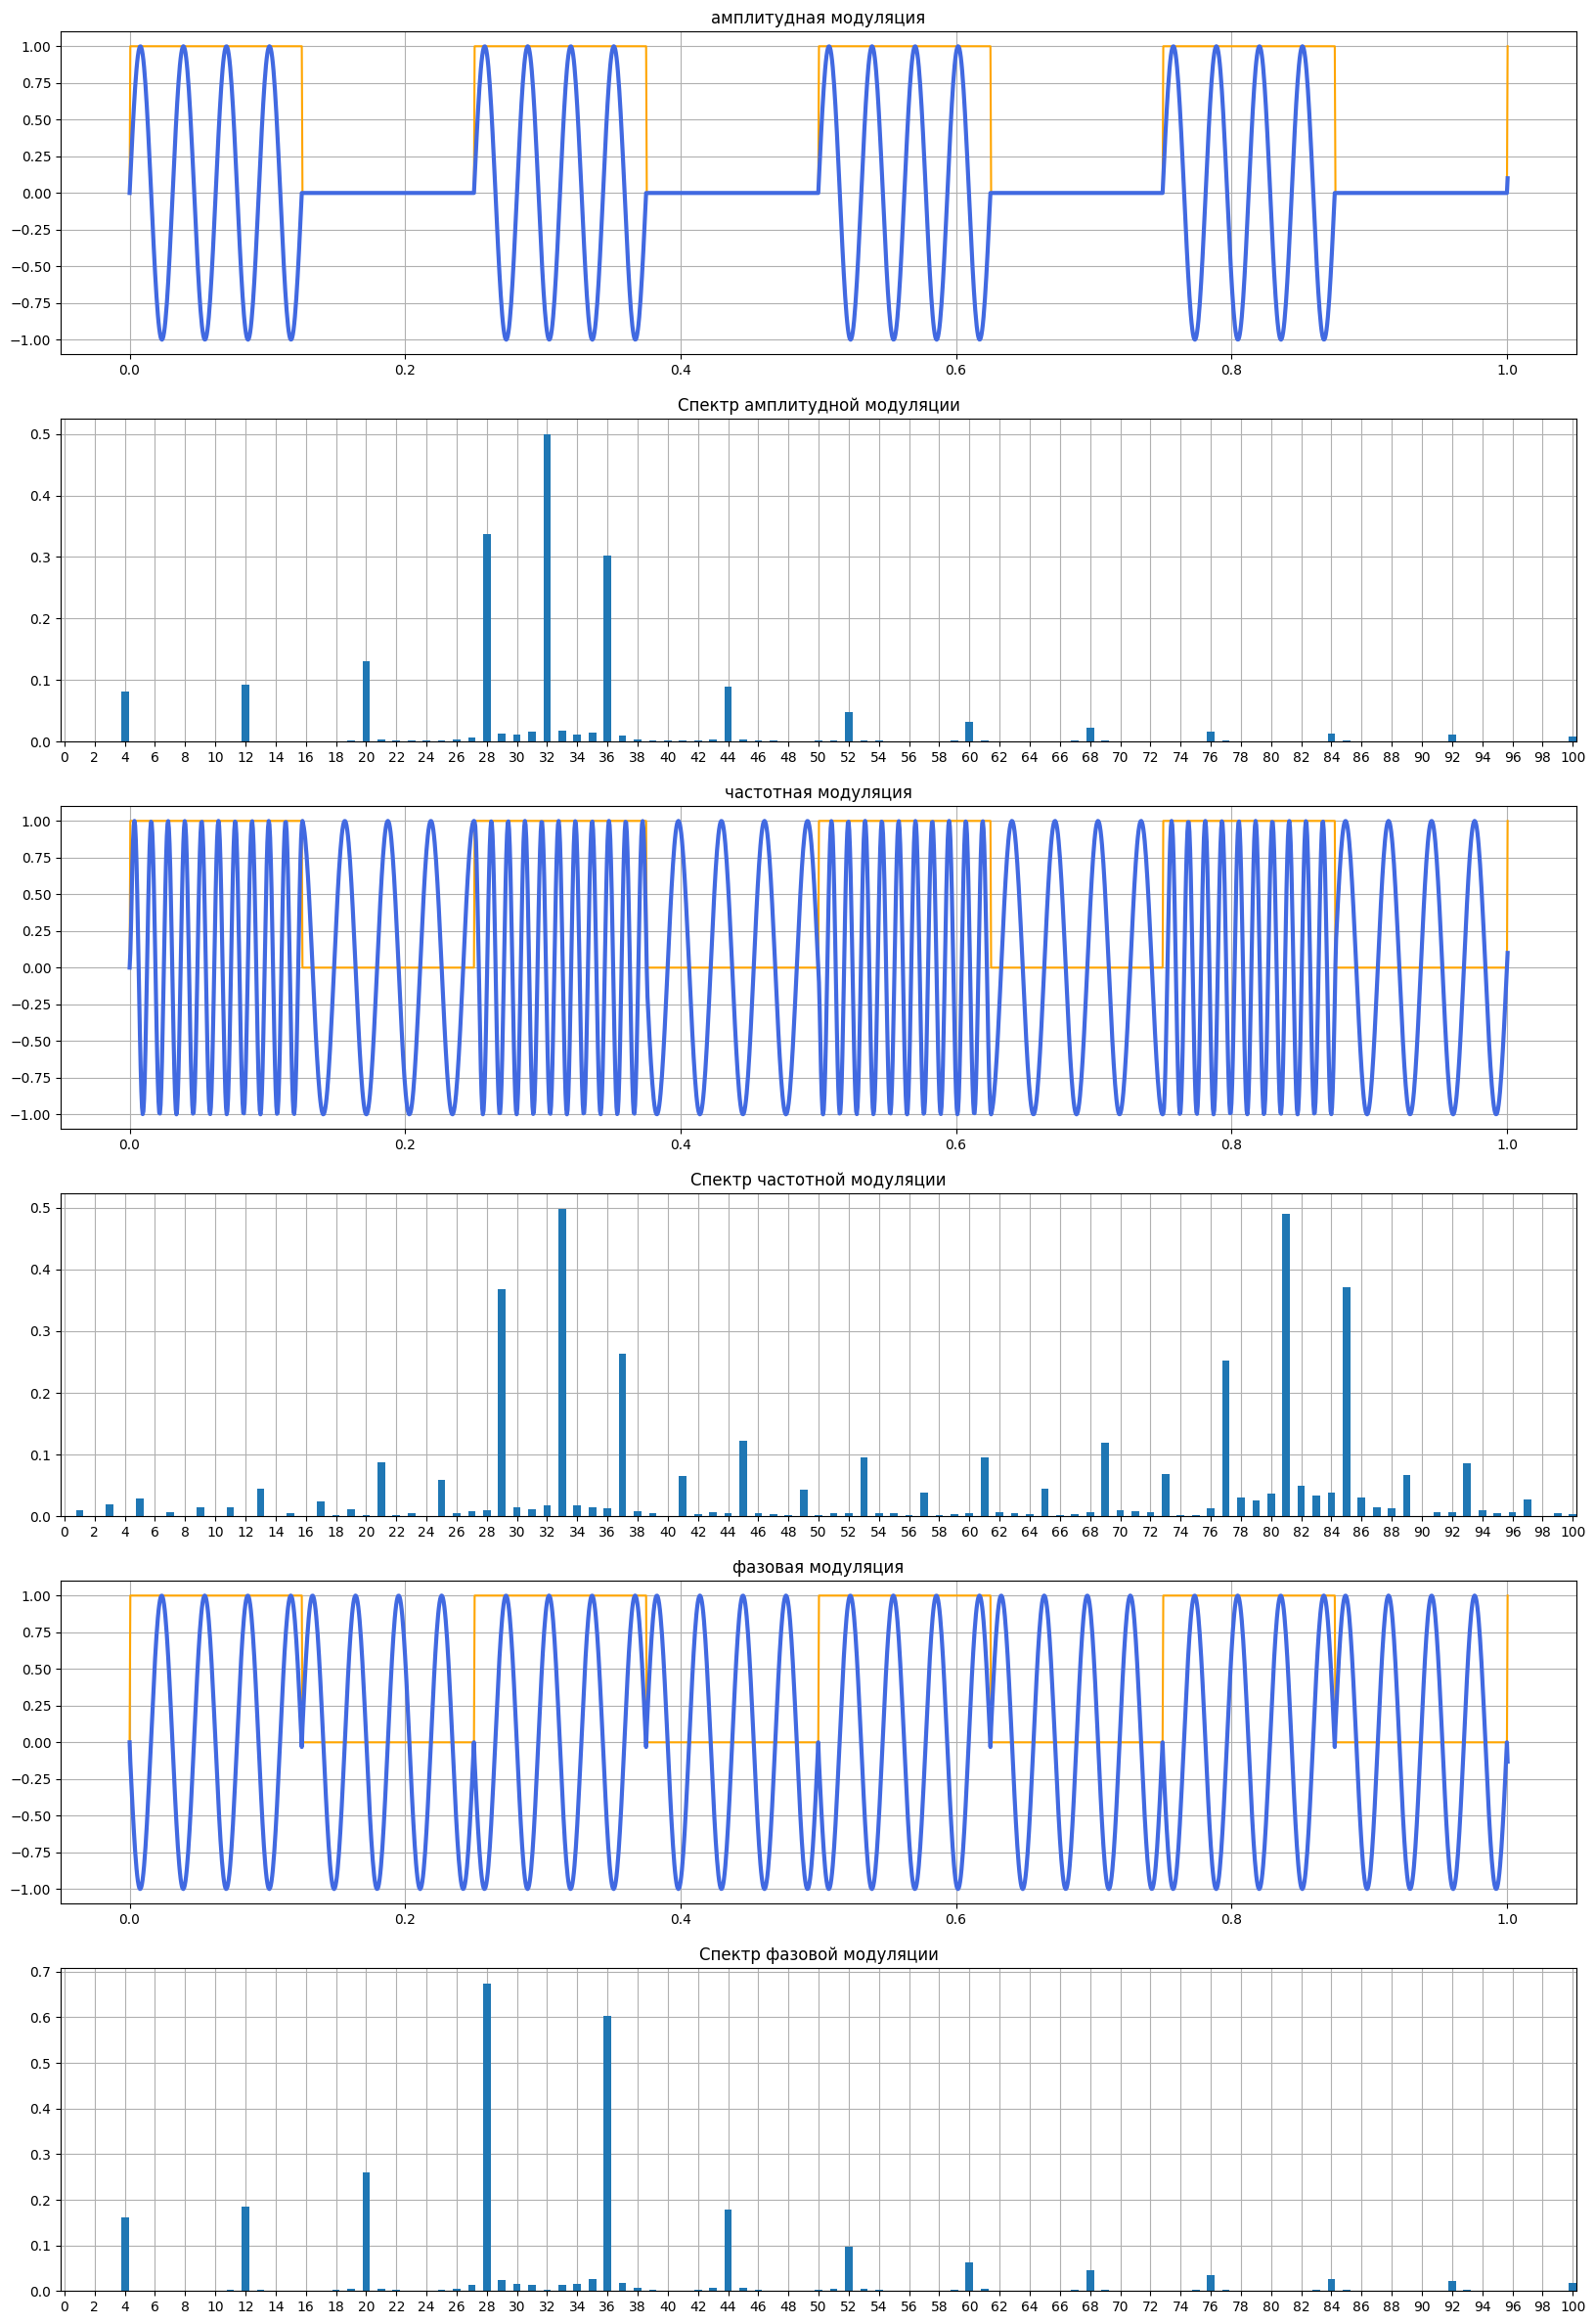

In [5]:
import matplotlib.pyplot as mpl
import numpy

time = numpy.arange(0, 1.001, 0.0005)

signal, carrier, result_amp = [], [], []
for t in time:
    signal.append(numpy.sign(numpy.sin(2*numpy.pi*4*t)))
    carrier.append(numpy.sin(2*numpy.pi*32*t))
signal = [(0 if i < 0 else i) for i in signal]
    
f, graphs = mpl.subplots(6, 1)
f.set_figheight(30)
f.set_figwidth(20)
mpl.rc('axes', axisbelow=True)

for i in range(len(graphs)):
    graphs[i].grid()
    if i % 2 == 1:
        graphs[i].set_xticks(range(0, 101, 2))
        graphs[i].set_axisbelow(True)
        graphs[i].margins(x=0)
        
#----------------амплитудная модуляция----------------
for i in range(len(time)):
    result_amp.append(carrier[i]*signal[i])
        
graphs[0].title.set_text("амплитудная модуляция")
graphs[0].plot(time, signal, color='orange')
graphs[0].plot(time, result_amp, color='royalblue', linewidth=3)

graphs[1].title.set_text("Спектр амплитудной модуляции")
x, y1 = numpy.fft.rfftfreq(2000, 0.0005), numpy.fft.rfft(result_amp)/1000
graphs[1].bar(x[0:101], abs(y1)[0:101], width=0.5)

#----------------частотная модуляция----------------
result, integrals = [], [] 
for t in range(len(time)):
    integrals.append(numpy.trapz(signal[:t],time[:t]))

for t in range(len(time)):
    result.append(numpy.sin(2*numpy.pi*32*t*0.0005 + 100*numpy.pi*integrals[t]))
        
graphs[2].title.set_text("частотная модуляция")
graphs[2].plot(time, signal, color='orange')
graphs[2].plot(time, result, color='royalblue', linewidth=3)

graphs[3].title.set_text("Спектр частотной модуляции")
x, y = numpy.fft.rfftfreq(2000, 0.0005), abs(numpy.fft.rfft(result))/1000
graphs[3].bar(x[0:101], y[0:101], width=0.5)

#----------------фазовая модуляция----------------
result = []
for t in range(len(time)):
    result.append(numpy.sin(2*numpy.pi*32*t*0.0005 + 15.74*signal[t]))
        
graphs[4].title.set_text("фазовая модуляция")
graphs[4].plot(time, signal, color='orange')
graphs[4].plot(time, result, color='royalblue', linewidth=3)

graphs[5].title.set_text("Спектр фазовой модуляции")
x, y = numpy.fft.rfftfreq(2000, 0.0005), abs(numpy.fft.rfft(result))/1000
y[0] = 0
graphs[5].bar(x[0:101], y[0:101], width=0.5)


%matplotlib inline

## Синтез сигнала урезанного спектра амплитудной модуляции

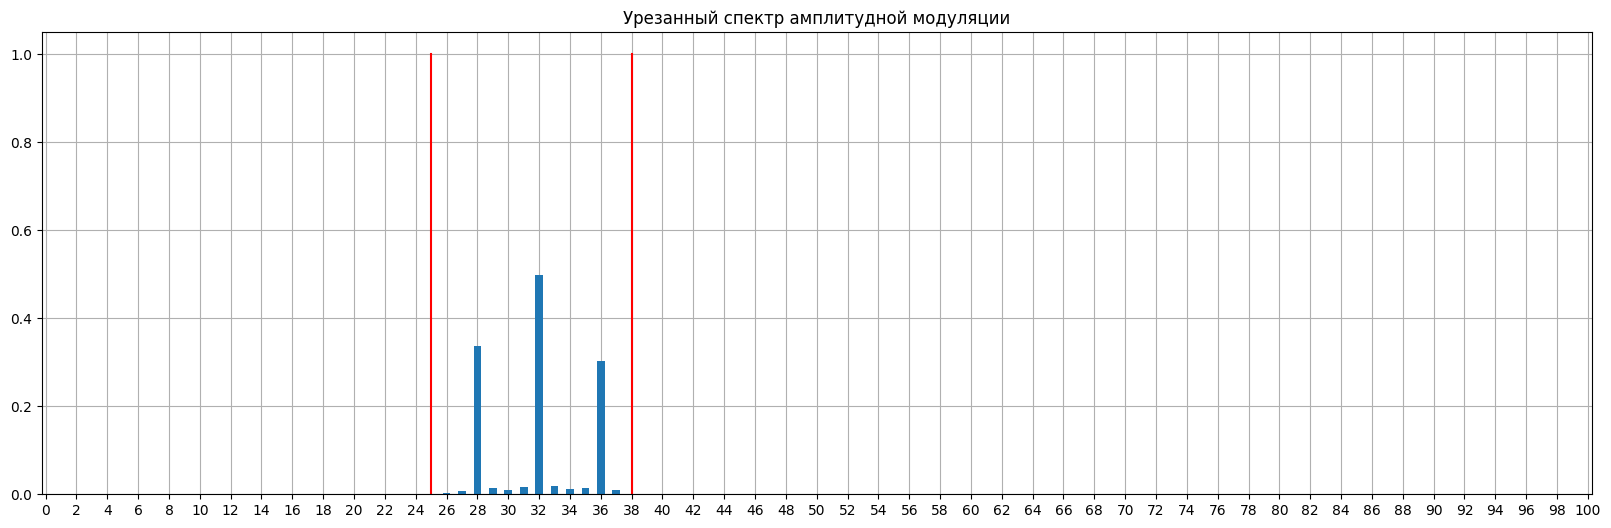

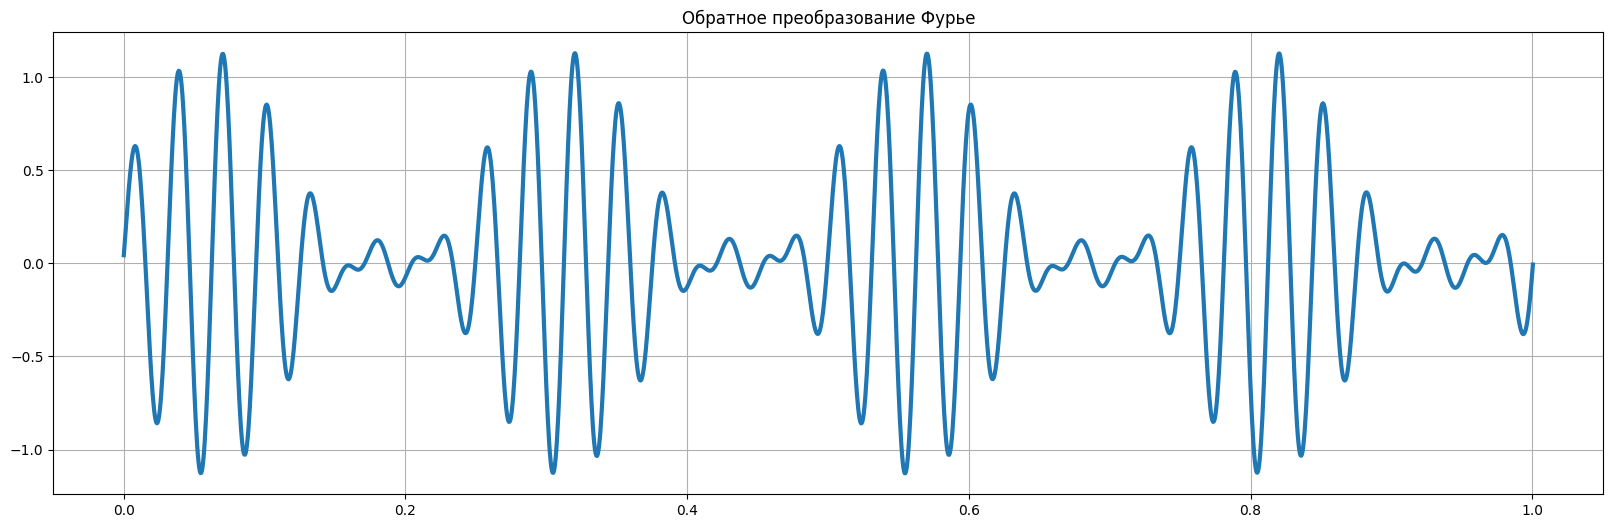

In [2]:
#----------------Урезанный спектр----------------
mpl.figure(figsize=(20, 6))
mpl.xticks(range(0, 101, 2))
mpl.grid()
mpl.margins(x=0)

spectrum = numpy.fft.rfft(result_amp)/1000
spectrum[38:] = 0
spectrum[0:26] = 0

mpl.title("Урезанный спектр амплитудной модуляции")
mpl.bar(numpy.fft.rfftfreq(2000, 0.0005)[0:101], abs(spectrum[0:101]), width=0.5)
mpl.plot((38,38), (0, 1), color="red")
mpl.plot((25,25), (0, 1), color="red")

#----------------обратное преобразование Фурье---------------- 
mpl.figure(figsize=(20, 6))
mpl.grid()

mpl.title("Обратное преобразование Фурье")
mpl.plot(time, numpy.fft.irfft(spectrum)*1000, linewidth=3)

## Построение огибающей

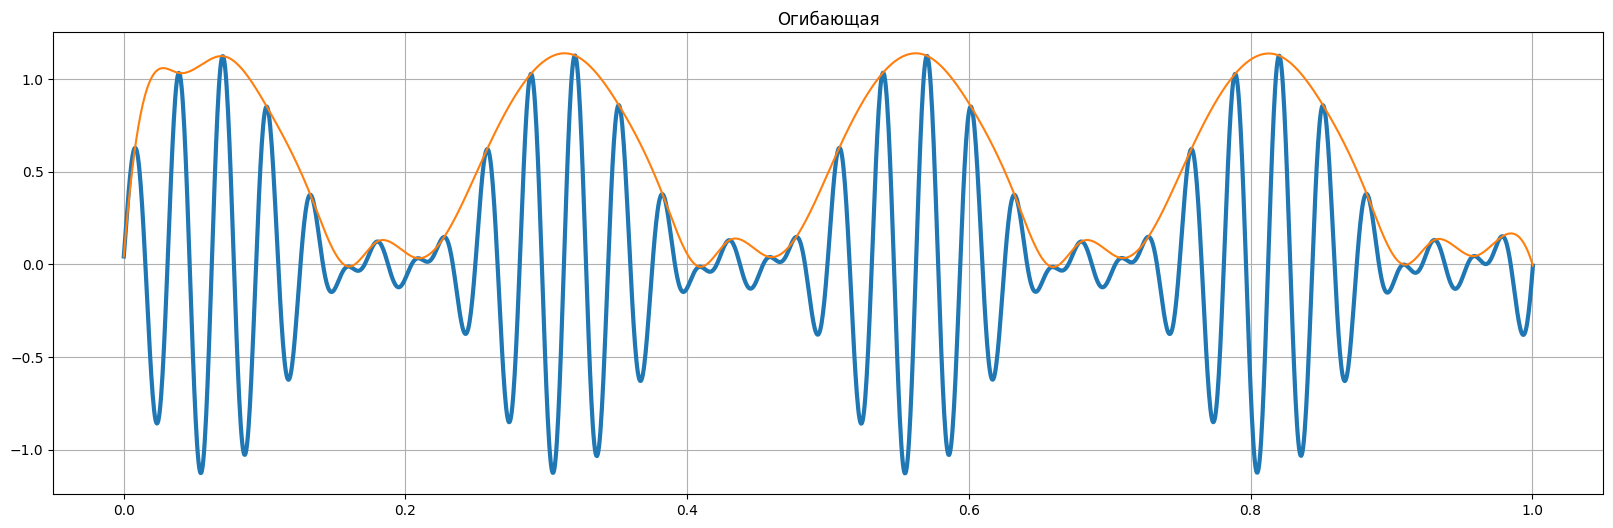

In [3]:
from scipy.interpolate import interp1d

sig = numpy.fft.irfft(spectrum)*1000

env_x = [0, ]
env_y = [sig[0], ]

for k in range(1,len(sig)-1):
    if (numpy.sign(sig[k]-sig[k-1])==1) and (numpy.sign(sig[k]-sig[k+1])==1):
        env_x.append(k)
        env_y.append(sig[k])

env_x.append(len(sig)-1)
env_y.append(sig[-1])

env_interp = interp1d(env_x,env_y, kind = 'cubic',bounds_error = False, fill_value=0.0)

env = []
for k in range(len(sig)):
    env.append(env_interp(k))
    
mpl.figure(figsize=(20, 6))
mpl.grid()    

mpl.title("Огибающая")
mpl.plot(time, numpy.fft.irfft(spectrum)*1000, linewidth=3)
mpl.plot(time, env)

## Фильтрация компаратором

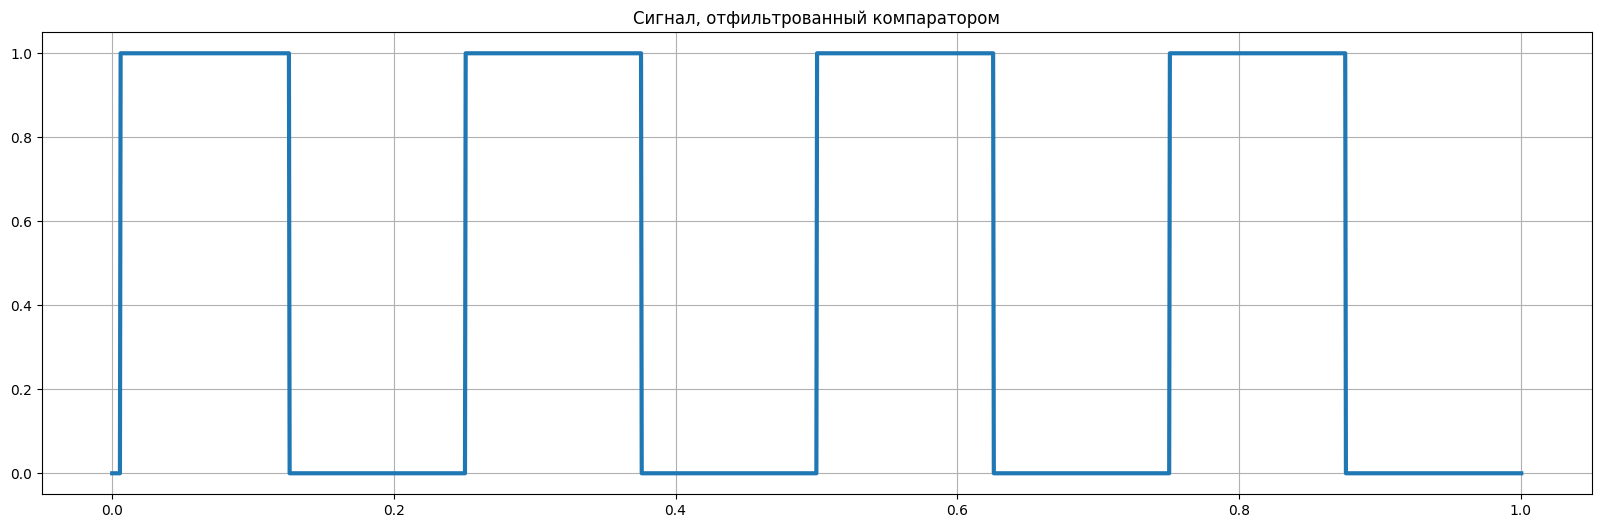

In [4]:
def comparator(x, v):
    if x > v:
        return 1
    else:
        return 0
    
filtrated = []
filtrated = [comparator(x, 0.5) for x in env]

mpl.figure(figsize=(20, 6))
mpl.grid()
mpl.title("Сигнал, отфильтрованный компаратором")
mpl.plot(time, filtrated, linewidth=3)